In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Digit Recognition


In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

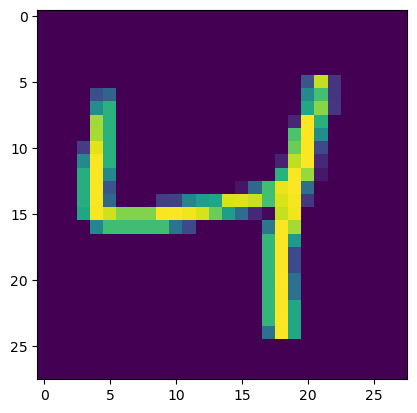

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2911 - accuracy: 0.9152 - val_loss: 0.1483 - val_accuracy: 0.9578
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1210 - accuracy: 0.9638 - val_loss: 0.1188 - val_accuracy: 0.9653
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0838 - accuracy: 0.9743 - val_loss: 0.1059 - val_accuracy: 0.9685
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.1071 - val_accuracy: 0.9699
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.1022 - val_accuracy: 0.9711
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.1023 - val_accuracy: 0.9727
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.1184 - val_accuracy:

In [16]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred = y_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9754

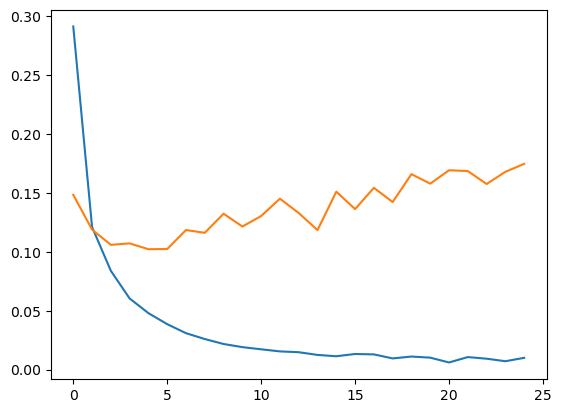

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

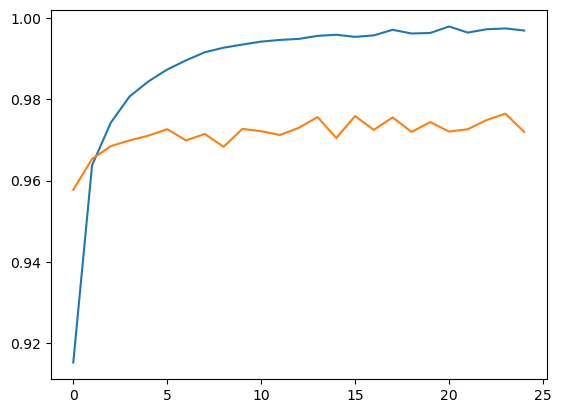

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

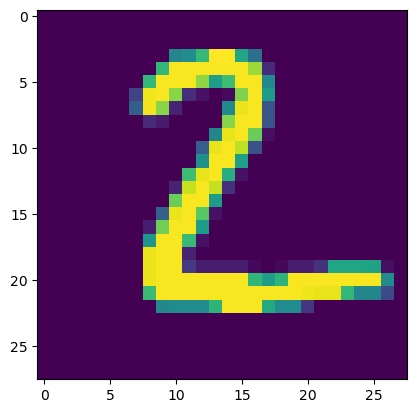

In [22]:
plt.imshow(X_test[1])

# Predicting the test images digit

In [23]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 30ms/step


array([2])

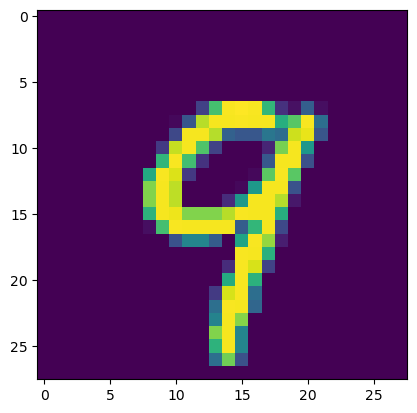

In [24]:
plt.imshow(X_test[12])

In [25]:
model.predict(X_test[12].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 26ms/step


array([9])

***Downloading The model***

In [27]:
from tensorflow import keras

# Assuming you have a trained model named 'model'
model.save("model.h5")
